In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import numpy.typing as npt
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage as ski

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        

datapath_train = "./mnist_data/mnist_train.csv"
datapath_test = "./mnist_data/mnist_test.csv"

datatype = np.float64

train_data = np.loadtxt(datapath_train, dtype=datatype, delimiter=",", skiprows=1)
test_data = np.loadtxt(datapath_test, dtype=datatype, delimiter=",", skiprows=1)
print(f"Shape of training data: {train_data.shape}")
print(f"Shape of test_data: {test_data.shape}")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Shape of training data: (60000, 785)
Shape of test_data: (10000, 785)


In [36]:
train_labels: npt.NDArray = train_data[:, 0].astype(np.uint8)
print(f"Shape of train labels: {train_labels.shape}")
train_vals = (train_data[:, 1:] - 128) / 128
print(f"Shape of train values: {train_vals.shape}")


test_labels: npt.NDArray = test_data[:, 0].astype(np.uint8)
print(f"Shape of test labels: {test_labels.shape}")
test_vals = (test_data[:, 1:] - 128) / 128
print(f"Shape of test values: {test_vals.shape}")

Shape of train labels: (60000,)
Shape of train values: (60000, 784)
Shape of test labels: (10000,)
Shape of test values: (10000, 784)


In [ ]:
def sigmoid(x: npt.NDArray) -> npt.NDArray:
    return 1 / (1 + np.exp(-x))

def tanh(x: npt.NDArray) -> npt.NDArray:
    return np.tanh(x)

def ReLU(x: npt.NDArray) -> npt.NDArray:
    """ReLU(x) = max(0, x)"""
    return x * (x > 0)

def percentages(x: npt.NDArray) -> npt.NDArray:
    return np.exp(x) / np.sum(np.exp(x))

def random_weights(dimensions: npt.ArrayLike, low: float = -1, high: float = 1) -> npt.NDArray:
    range = high - low
    return np.random.rand(*dimensions) * range + low

def print_percentages(percentages_array: npt.NDArray) -> None:
    for i, p in enumerate(percentages_array):
        print(f"{i} = {round(p * 100, 3)}%")

In [ ]:
def sigmoid_derivative(x: npt.NDArray):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU_derivative(x: npt.NDArray):
    return 1 * (x > 0)

def tanh_derivative(x: npt.NDArray):
    t = np.tanh(x)
    return 1 - (t * t)

def softmax(x: npt.NDArray):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
    
def cross_entropy_loss(predictions, labels):
    num_samples = predictions.shape[0]
    correct_logprobs = -np.log(predictions[range(num_samples), labels.astype(int)])
    loss = np.sum(correct_logprobs) / num_samples

    return loss

    # hidden_weight_gradient = 
    # dCdW = layer_activation * dCdz
    # dCdb = dCdz
    # dCda = layer_weights * dCdz

    # return np.array(dCdW + dCdb + dCda)

# gain = 0.1
# learning_rate = 0.5
# output_gradient = tanh_derivative(output_loss)
#hidden_gradient = ReLU_derivative(np.dot(output_loss, hidden_layer_weights))

#calculate_loss_gradient(output_layer_weights, activations, loss, dist)

In [ ]:
num_mid_layer = 1000

# 784 -> `hidden_layer_size` -> 10

hidden_layer_weights = np.random.normal(0, 0.1, (hidden_layer_size, 784)) #random_weights((hidden_layer_size, 784)) # Random values in the range [-1, 1)
hidden_layer_bias = np.zeros((hidden_layer_size,), dtype=datatype)

output_layer_weights = np.random.normal(0, 0.1, (10, hidden_layer_size)) # random_weights((10, hidden_layer_size))
output_layer_bias = np.zeros((10,), dtype=datatype)
truth_table = (np.identity(10, dtype=datatype))  # 0 to 1

def backpropagation(input_vector, target, learning_rate=0.01):
    global hidden_layer_weights, output_layer_weights
    global hidden_layer_bias, output_layer_bias

    # Feedforward
    hidden_layer_z = np.dot(hidden_layer_weights, input_vector).T + hidden_layer_bias
    hidden_layer_a = ReLU(hidden_layer_z)
    output_layer_z = np.dot(output_layer_weights, hidden_layer_a.T).T + output_layer_bias
    output_layer_a = softmax(output_layer_z)

    # Compute the output layer error
    y_true = truth_table[int(target)]
    output_error = (output_layer_a - y_true)

    # Compute the hidden layer error
    hidden_error = np.dot(output_error, output_layer_weights) * ReLU_derivative(hidden_layer_z)

    # Update weights and biases
    # Output layer
    output_layer_weights -= learning_rate * np.outer(output_error, hidden_layer_a)
    output_layer_bias -= learning_rate * output_error

    # Hidden layer
    hidden_layer_weights -= learning_rate * np.outer(hidden_error.T, input_vector)
    hidden_layer_bias -= learning_rate * hidden_error.flatten()

    return np.sum((output_layer_a - y_true) ** 2)  # Return the loss
    

# Training loop
epochs = 10
batch_size = 32
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, len(train_vals), batch_size):
        batch_inputs = train_vals[i:i+batch_size]
        batch_targets = train_labels[i:i+batch_size]
        for input_vector, target in zip(batch_inputs, batch_targets):
            loss = backpropagation(input_vector, target)
            total_loss += loss
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_vals)}")


KeyboardInterrupt: 

In [220]:
validation_set_size = 1000
training_set_vals = train_vals[validation_set_size:]
training_set_labels = train_labels[validation_set_size:]

validation_set_vals = train_vals[0:validation_set_size]
validation_set_labels = train_labels[0:validation_set_size]


In [ ]:
# Test the model
def test():
    correct = 0
    for input_vector, target in zip(validation_set_vals, validation_set_labels):
        hidden_layer_a = ReLU(np.dot(hidden_layer_weights, input_vector).T + hidden_layer_bias)
        output_layer_a = softmax(np.dot(output_layer_weights, hidden_layer_a.T).T + output_layer_bias)
        prediction = np.argmax(output_layer_a)
        if prediction == target:
            correct += 1
            
    accuracy = correct / validation_set_size
    #print(f"Test accuracy: {accuracy * 100:.2f}%")
    return accuracy

In [229]:
hidden_layer_size = 100
hidden_layer_weights = np.random.normal(0, 0.1, (hidden_layer_size, 784)) #random_weights((hidden_layer_size, 784)) # Random values in the range [-1, 1)
hidden_layer_bias = np.zeros((hidden_layer_size,), dtype=datatype)

output_layer_weights = np.random.normal(0, 0.1, (10, hidden_layer_size)) # random_weights((10, hidden_layer_size))
output_layer_bias = np.zeros((10,), dtype=datatype)
truth_table = (np.identity(10, dtype=datatype))  # 0 to 1

def feedforward(input_vector: npt.NDArray):
    # Feedforward
    hidden_layer_z = np.dot(input_vector, hidden_layer_weights.T) + hidden_layer_bias
    hidden_layer_a = ReLU(hidden_layer_z)
    output_layer_z = np.dot(hidden_layer_a, output_layer_weights.T) + output_layer_bias
    output_layer_a = softmax(output_layer_z)

    return output_layer_a, hidden_layer_a

def train(learning_rate=0.01):
    global hidden_layer_weights, output_layer_weights
    global hidden_layer_bias, output_layer_bias

    epochs = 100
    batch_size = 32
    best_accuracy = 0

    # In each epoch, shuffle the order of the training images so the model does not learn the order
    for epoch_num in range(epochs):
        shuffled_indices = np.arange(len(training_set_labels))
        np.random.shuffle(shuffled_indices)
        shuffled_vals = training_set_vals[shuffled_indices]
        shuffled_labels = training_set_labels[shuffled_indices]
        total_loss = 0

        # Update the weights in batches to avoid training in any particular direction
        for batch_num in range(0, len(training_set_vals) // batch_size):
            batch_start = batch_num * batch_size
            batch_end = batch_start + batch_size

            input_batch = shuffled_vals[batch_start : batch_end]
            label_batch = shuffled_labels[batch_start: batch_end]

            # feedforward
            hidden_z = np.dot(input_batch, hidden_layer_weights.T) + hidden_layer_bias
            hidden_a = ReLU(hidden_z)
            output_z = np.dot(hidden_a, output_layer_weights.T) + output_layer_bias
            output_a = softmax(output_z)

            # backprop
            y_true = np.eye(10)[label_batch]
            output_error = output_a - y_true
            hidden_error = np.dot(output_error, output_layer_weights) * ReLU_derivative(hidden_a)
            
            # Update output layer
            output_layer_weights -= learning_rate * (np.dot(output_error.T, hidden_a) / batch_size)
            output_layer_bias -= learning_rate * np.mean(output_error, axis=0)

            # Update hidden layer
            hidden_layer_weights -= learning_rate * (np.dot(hidden_error.T, input_batch) / batch_size)
            hidden_layer_bias -= learning_rate * np.mean(hidden_error, axis=0)

            total_loss += np.sum(output_error ** 2)

        print(f"Epoch: {epoch_num}: total loss = {total_loss}")

        accuracy = test()
        print(f"Accuracy on test: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
        else:
            print("Did not improve: exiting.")
            break

        learning_rate *= 0.99



train()

Epoch: 0: total loss = 13902.09510813158
Accuracy on test: 0.893
Epoch: 1: total loss = 8171.221635887625
Accuracy on test: 0.911
Epoch: 2: total loss = 6861.323635022885
Accuracy on test: 0.925
Epoch: 3: total loss = 5969.2241276696495
Accuracy on test: 0.933
Epoch: 4: total loss = 5324.019550548197
Accuracy on test: 0.936
Epoch: 5: total loss = 4822.959044400571
Accuracy on test: 0.94
Epoch: 6: total loss = 4446.225607921637
Accuracy on test: 0.942
Epoch: 7: total loss = 4127.117522492192
Accuracy on test: 0.944
Epoch: 8: total loss = 3842.213894313576
Accuracy on test: 0.95
Epoch: 9: total loss = 3621.197622261547
Accuracy on test: 0.951
Epoch: 10: total loss = 3438.772418578457
Accuracy on test: 0.953
Epoch: 11: total loss = 3236.133259648965
Accuracy on test: 0.953
Did not improve: exiting.


In [237]:
np.isin(validation_set_vals[0], training_set_vals)

In [231]:
from PIL import Image

img = Image.open("MySevenDark.png").convert('L')

img_array = ((np.array(img, dtype=datatype) - 128) / 128)
img_flat = img_array.T.flatten()

for idx, i in enumerate(feedforward(img_flat)[0]):
    print(idx, (i // 0.0001) * 0.0001) 
feedforward(img_flat)[0].argmax()

0 0.0012000000000000001
1 0.0001
2 0.7207
3 0.0005
4 0.1297
5 0.0001
6 0.0358
7 0.003
8 0.0381
9 0.0702


np.int64(2)

In [232]:
import pygame
pygame.init()
screen = pygame.display.set_mode((280, 280))
done = False

pygame.font.init()
f = pygame.font.SysFont(None, 12)
def draw_num_at_pos(surface, num: int, position):
    rendered_num = f.render(f"{num}", True, (255, 255, 255))
    rn_rect = rendered_num.get_rect()
    rn_rect.center = position

    surface.blit(rendered_num, rn_rect)

draw_surf = pygame.Surface((280, 280))
model_surf = pygame.Surface((28, 28))
clock = pygame.time.Clock()
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                done = True

            if event.key == pygame.K_SPACE:
                draw_surf.fill((0, 0, 0))

            if event.key == pygame.K_F2:
                model_surfarray = pygame.surfarray.pixels3d(model_surf).astype(datatype)
                model_surfarray = model_surfarray.T
                pygame.image.save(model_surf, "model_img.png")

    mouse_buttons = pygame.mouse.get_pressed()
    if mouse_buttons[0]:
        pygame.draw.aacircle(draw_surf, (255, 255, 255), pygame.mouse.get_pos(), 8)
    elif mouse_buttons[2]:
        pygame.draw.aacircle(draw_surf, (0, 0, 0), pygame.mouse.get_pos(), 8)

    pygame.transform.scale(draw_surf, (28, 28), model_surf)
    model_surfarray = pygame.surfarray.pixels3d(model_surf).astype(datatype)
    model_input = (model_surfarray[:, :, 0] - 128) / 128
    model_output = feedforward(model_input.T.flatten())[0]

    screen.blit(draw_surf, (0, 0))
    width = 28
    for idx, prob in enumerate(model_output):
        c = int(prob * 200)
        draw_rect = pygame.Rect((idx * width, 0, width, width))
        pygame.draw.rect(screen, (c, c, c), draw_rect)
        draw_num_at_pos(screen, idx, draw_rect.center)
    screen.blit(model_surf, (0, width))

    pygame.display.set_caption(f"Guess: {model_output.argmax()}. TL: {model_input.max()}")

    pygame.display.flip()
    
pygame.quit()


0.9921875
-1.0
-1.0


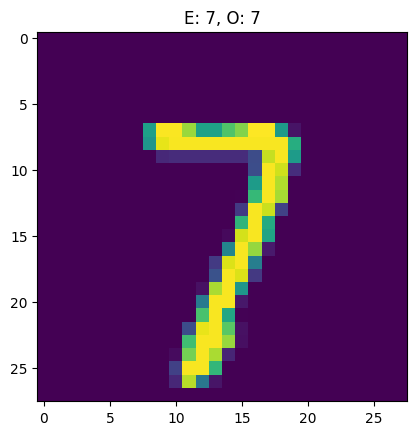

In [214]:
import matplotlib.pyplot as plt
import random

i = random.randint(0, 10000)

print(test_vals[i].max())
print(test_vals[i].min())

print(test_vals[i][0])


plt.imshow(test_vals[i].reshape((28, 28)))
plt.title(f"E: {test_labels[i]}, O: {feedforward(test_vals[i])[0].argmax()}")
plt.show()

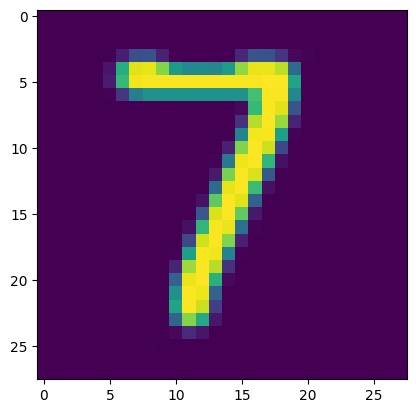

0 0.0023
1 0.0245
2 0.053200000000000004
3 0.0241
4 0.0053
5 0.8075
6 0.0073
7 0.0678
8 0.0013000000000000002
9 0.006200000000000001


In [215]:
from PIL import Image

img = Image.open("MySevenDark.png").convert('L')

img_array = ((np.array(img, dtype=datatype) - 128) / 128)
img_flat = img_array.flatten()

model_input = (img_flat - 128) / 128
model_output = feedforward(model_input.flatten())[0]

plt.imshow(model_input.reshape((28, 28)))
plt.show()


for idx, i in enumerate(model_output):
    print(idx, (i // 0.0001) * 0.0001) 

0 0.9999
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
